In [2]:
!pip install pot



In [ ]:
#import os
#from pathlib import Path

from PIL import Image
import numpy as np
#from matplotlib import pyplot as plt
#import ot
#import imageio
from copy import copy
#import cvxpy as cp


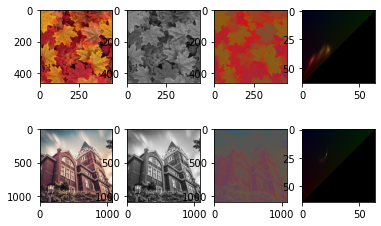

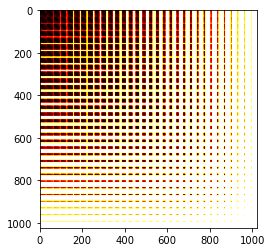

0 0.09557042570253951 0.034121172199493364 1.0
10 0.23635948328018314 0.05548351647586245 1.0
20 0.2627210585969081 0.05840358334741186 1.0
30 0.28435631081412527 0.06169764898583825 1.0
40 0.30279022656357235 0.06496318594546194 1.0
50 0.31878833565558196 0.06813368289034463 1.0
60 0.3328175231073642 0.07117020159709254 1.0
70 0.34522313507170355 0.07405286654933188 1.0
80 0.3562723858234488 0.07677239813443837 1.0
90 0.36618086832605395 0.07931597952867012 1.0
100 0.37513394831722363 0.08165330802041626 1.0
110 0.3832864765006265 0.08379019624094437 1.0
120 0.39075755619811164 0.085745885689998 1.0
130 0.39764512353068615 0.08752508209402937 1.0
140 0.40403110107530044 0.08914114008066856 1.0
150 0.4099852681972245 0.09060388306798546 1.0
160 0.4155630682935818 0.09193529987988783 1.0
170 0.4208082742415902 0.09315224585608488 1.0
180 0.42575700170533665 0.09426502959332943 1.0
190 0.4304422099944374 0.09527654609355032 1.0
200 0.43489323748508146 0.0961868075184689 1.0
210 0.4391377

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


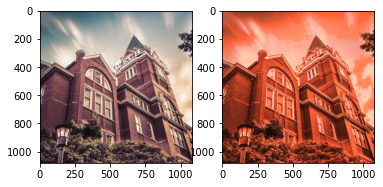

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AttributeError: 'numpy.ndarray' object has no attribute 'read'

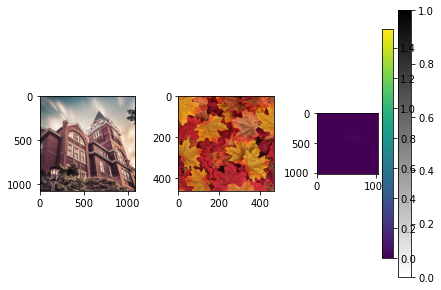

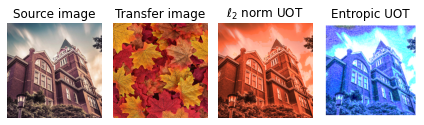

In [3]:
rng = np.random.RandomState(42)

import cv2
image_ent = cv2.imread("entropic_uot.png");
gray = cv2.cvtColor(image_ent, cv2.COLOR_BGR2GRAY)
cv2.imshow('Original image',image_ent)
cv2.imshow('Gray image', gray)

np.shape(image_ent)

from sot import *;
import numpy as np
import matplotlib.pyplot as plt

def rgb2luv(I):
    J = np.zeros(I.shape);
    J[:,:,0] = np.sum(I,axis=2);
    J[:,:,1] = I[:,:,0]/(1e-14+J[:,:,0]);
    J[:,:,2] = I[:,:,1]/(1e-14+J[:,:,0]);
    return J;

def luv2rgb(J):
    I = np.zeros(J.shape);
    I[:,:,0] = (J[:,:,0]+1e-14)*J[:,:,1];
    I[:,:,1] = (J[:,:,0]+1e-14)*J[:,:,2];
    I[:,:,2] = (J[:,:,0]+1e-14)*(1.0-J[:,:,1]-J[:,:,2]);
    return I;

def make_2d_histogram(X,B):
    H = np.zeros((B,B));
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
           r = X[i,j,1];
           g = X[i,j,2];
           
           k = int(np.clip(B*r,0,B-1));
           l = int(np.clip(B*g,0,B-1));

           H[k,l] += 1.0;
    
    H /= X.shape[0]*X.shape[1];
    return H;

def make_3d_histogram(X,B):
    H = np.zeros((B,B,B));
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            r = int(np.clip(B*X[i,j,0],0,B-1));
            g = int(np.clip(B*X[i,j,1],0,B-1));
            b = int(np.clip(B*X[i,j,2],0,B-1));
            H[r,g,b] += 1.0;
    H /= X.shape[0]*X.shape[1];
    return H;

#X = img.imread("blossom.jpg")/255.0;
#Y = img.imread("forest.jpg")/255.0;


Y = img.imread("gatech.jpeg")/255.0;
X = img.imread("fall leaves.jpg")/255.0;
Z = img.imread("entropic_uot.png")/255.0;

luvX = rgb2luv(X);
luvY = rgb2luv(Y);

chrX = X/(1e-14+np.repeat(luvX[:,:,0].reshape((X.shape[0],X.shape[1],1)),3,axis=2));
chrY = Y/(1e-14+np.repeat(luvY[:,:,0].reshape((Y.shape[0],Y.shape[1],1)),3,axis=2));

B = 64;

L = np.linspace(0.0,1.0,B);
C = np.zeros((B,B,3));

for k in range(B):
    for l in range(B-k):
        r = L[k];
        g = L[l];
        b = 1.0-r-g;
        C[k,l,0] = r;
        C[k,l,1] = g;
        C[k,l,2] = b;
            
mu = make_2d_histogram(luvX,B);
nu = make_2d_histogram(luvY,B);

smu = mu/np.max(mu);
snu = nu/np.max(nu);

Cmu = C*(0.125+0.875*np.repeat(smu.reshape((B,B,1)),3,axis=2));
Cnu = C*(0.125+0.875*np.repeat(snu.reshape((B,B,1)),3,axis=2));


f, ax = plt.subplots(2,4);
ax[0,0].imshow(X);
ax[0,1].imshow(luvX[:,:,0],cmap='gray');
ax[0,2].imshow(chrX);
ax[0,3].imshow(Cmu,cmap='gray');

ax[1,0].imshow(Y);
ax[1,1].imshow(luvY[:,:,0],cmap='gray');
ax[1,2].imshow(chrY);
ax[1,3].imshow(Cnu,cmap='gray');

plt.show();

B = 32;

D = 4*(B-1.0)**2*np.ones((B*B,B*B)); # what is this?
for i in range(B):
    for j in range(B-i):        
        for k in range(B):
            for l in range(B-k):
                D[B*i+j,B*k+l] = (i-k)**2+(j-l)**2;
D /= (B-1.0)**2;
plt.imshow(D,cmap='hot');
plt.show();

mu = make_2d_histogram(luvX,B);
nu = make_2d_histogram(luvY,B);

T = opt_ot(nu.reshape((-1,)),mu.reshape((-1,)),D,L=1000,igam=1e-3);
T_ent = 0;
#T += 1e-14;
#T /= np.sum(T);

om = np.zeros((B,B,3));
for i in range(B):
    for j in range(B-i):
        som = 1e-14;
        for k in range(B):
            for l in range(B-k):
                om[i,j,0] += k*T[B*i+j,B*k+l];
                om[i,j,1] += l*T[B*i+j,B*k+l];
                om[i,j,2] += (B-1-k-l)*T[B*i+j,B*k+l];
                som += T[B*i+j,B*k+l];
        om[i,j,0] /= som;
        om[i,j,1] /= som;
        om[i,j,2] /= som;

cY = np.zeros(Y.shape);
nY = np.zeros(Y.shape);
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        r = luvY[i,j,1];
        g = luvY[i,j,2];
        b = 1-r-g;
        
        k = int(np.clip(B*r,0.0,B-1.0));
        l = int(np.clip(B*g,0.0,B-1.0));
        
        cY[i,j,:] = (luvY[i,j,0]+1e-14)*np.array([r,g,b]);
        nY[i,j,:] = (luvY[i,j,0]+1e-14)*om[k,l,:]/(B-1.0);

f, ax = plt.subplots(1,2);
ax[0].imshow(cY);
ax[1].imshow(nY);
plt.show();

f, ax = plt.subplots(1,3);
ax[0].imshow(cY);
ax[1].imshow(X);
ax[2].imshow(nY);
f.tight_layout();

plt.imshow(T > 0.01, cmap = 'binary');
plt.colorbar();


plt.imshow(T);
plt.colorbar();


sum(sum(T > 0.01))/(np.shape(T)[0]*np.shape(T)[1])

np.shape(T)

len(T)

f, ax = plt.subplots(1,4);
ax[0].imshow(cY);
ax[0].axis('off')
ax[0].title.set_text('Source image')

ax[1].imshow(X);
ax[1].axis('off')
ax[1].title.set_text('Transfer image')

ax[2].imshow(nY);
ax[2].axis('off')
ax[2].title.set_text('$\ell_2$ norm UOT')

ax[3].imshow(image_ent);
ax[3].axis('off')
ax[3].title.set_text('Entropic UOT')

f.tight_layout();





np.shape(X)

np.shape(nY)

np.shape(cY)

image_ent = Image.open(Z)
image_ent.load()



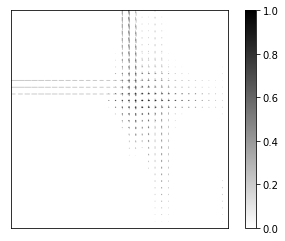

In [7]:
plt.imshow(T > 0.01, cmap = 'binary');
plt.xticks([])
plt.yticks([])
plt.box(True)
plt.colorbar();


In [5]:
def cmyk_to_rgb(c, m, y, k, cmyk_scale, rgb_scale=255):
    r = rgb_scale * (1.0 - c / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    g = rgb_scale * (1.0 - m / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    b = rgb_scale * (1.0 - y / float(cmyk_scale)) * (1.0 - k / float(cmyk_scale))
    return r, g, b

from PIL import Image
image_ent = Image.open('entropic_uot.png')
if image_ent.mode == 'CMYK':
    image_ent = image_ent.convert('RGB')

plt.imshow(image)

NameError: name 'image' is not defined

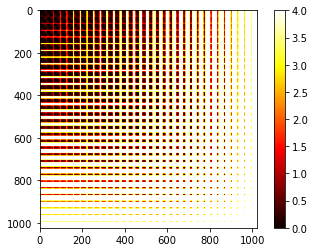

In [9]:
plt.imshow(D,cmap='hot');
plt.colorbar();
plt.show();